# Project HR


Predict attrition of your valuable employees



# Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.pop("EmployeeNumber")
df.pop("Over18")
df.pop("StandardHours")
df.pop("EmployeeCount")

0       1
1       1
2       1
3       1
4       1
       ..
1465    1
1466    1
1467    1
1468    1
1469    1
Name: EmployeeCount, Length: 1470, dtype: int64

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 31)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [8]:
y = df["Attrition"]
X = df
X.pop("Attrition")

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [9]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [11]:
y = le.fit_transform(y)

In [12]:
y.shape

(1470, 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [14]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [15]:
# instead of using one-hot encoding, using get_dummies here!
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'], prefix='Department')
ind_EducationField = pd.get_dummies(df['EducationField'], prefix='EducationField')
ind_Gender = pd.get_dummies(df['Gender'], prefix='Gender')
ind_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
ind_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime')

In [16]:
ind_BusinessTravel.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,False,False,True
1,False,True,False
2,False,False,True
3,False,True,False
4,False,False,True


In [17]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [18]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, 
                 ind_JobRole, ind_MaritalStatus, ind_OverTime])

In [19]:
df.select_dtypes(['int64'])

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [20]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, 
                 ind_JobRole, ind_MaritalStatus, ind_OverTime, df.select_dtypes(['int64'])], axis=1)

In [21]:
df1.shape

(1470, 51)

# Applying Decision Tree

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier(random_state=42)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
accuracy_score(y_train, clf.predict(X_train))

1.0

In [28]:
print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       931
           1       1.00      1.00      1.00       171

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102



In [29]:
confusion_matrix(y_train, clf.predict(X_train))

array([[931,   0],
       [  0, 171]], dtype=int64)

### testing 

In [30]:
accuracy_score(y_test, clf.predict(X_test))

0.7445652173913043

In [31]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       302
           1       0.29      0.30      0.30        66

    accuracy                           0.74       368
   macro avg       0.57      0.57      0.57       368
weighted avg       0.75      0.74      0.75       368



In [32]:
confusion_matrix(y_test, clf.predict(X_test))

array([[254,  48],
       [ 46,  20]], dtype=int64)

In [43]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")        
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_test, clf.predict(X_test))))    
        

***

# Bagging 

In [45]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
bag_clf = BaggingClassifier(estimator=clf, n_estimators=5000, bootstrap=True,
                             n_jobs=-1, random_state=42)
y_train = y_train.ravel()

In [47]:
bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=5000, n_jobs=-1, random_state=42)

In [50]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       931
           1       1.00      1.00      1.00       171

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[931   0]
 [  0 171]]

Average Accuracy: 	 0.8593
Accuracy SD: 		 0.0196


In [51]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8288

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       302
           1       0.55      0.24      0.34        66

    accuracy                           0.83       368
   macro avg       0.70      0.60      0.62       368
weighted avg       0.80      0.83      0.80       368


Confusion Matrix: 
 [[289  13]
 [ 50  16]]



***

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf_clf = RandomForestClassifier()

In [54]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       931
           1       1.00      1.00      1.00       171

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[931   0]
 [  0 171]]

Average Accuracy: 	 0.8694
Accuracy SD: 		 0.0202


In [56]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8478

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       302
           1       0.86      0.18      0.30        66

    accuracy                           0.85       368
   macro avg       0.85      0.59      0.61       368
weighted avg       0.85      0.85      0.80       368


Confusion Matrix: 
 [[300   2]
 [ 54  12]]



<h1>Lets look at the significant features:


In [57]:
import seaborn as sns

<Axes: >

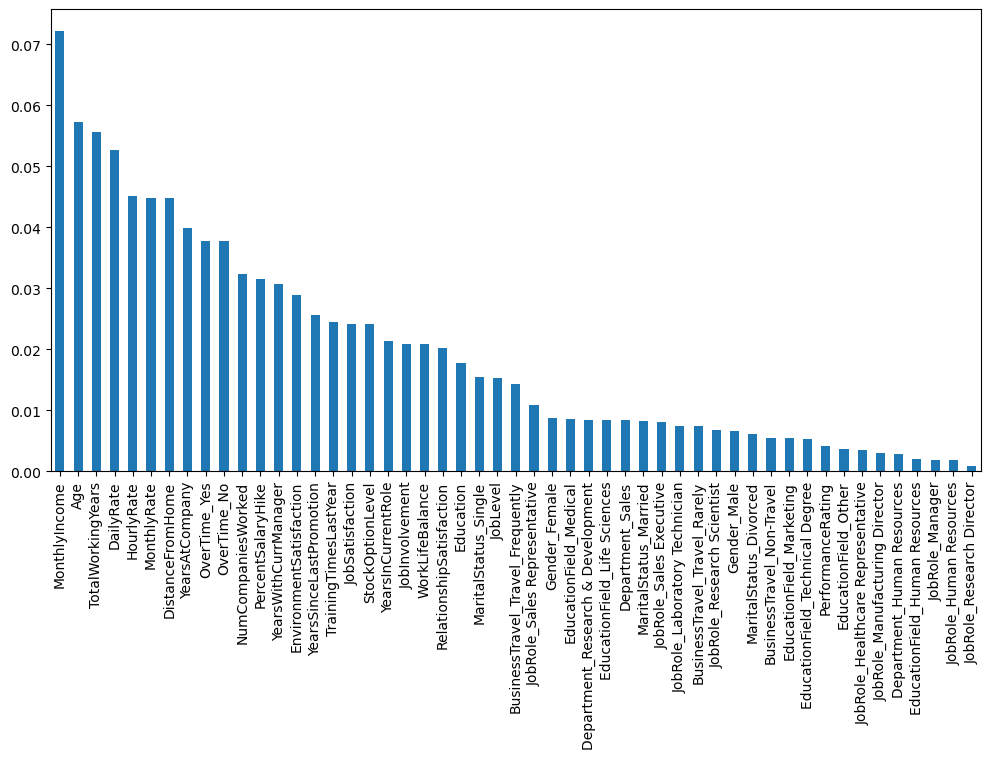

In [58]:
pd.Series(rf_clf.feature_importances_,
          index=X_train.columns).sort_values(ascending=False).plot(kind='bar', figsize=(12,6))

***

# ADABoost

In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
ada_clf = AdaBoostClassifier()

In [68]:
ada_clf.fit(X_train, y_train)

C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [69]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9038

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       931
           1       0.84      0.47      0.60       171

    accuracy                           0.90      1102
   macro avg       0.88      0.73      0.77      1102
weighted avg       0.90      0.90      0.89      1102


Confusion Matrix: 
 [[916  15]
 [ 91  80]]



C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Average Accuracy: 	 0.8739
Accuracy SD: 		 0.0278


In [71]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8533

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.92       302
           1       0.71      0.30      0.43        66

    accuracy                           0.85       368
   macro avg       0.79      0.64      0.67       368
weighted avg       0.84      0.85      0.83       368


Confusion Matrix: 
 [[294   8]
 [ 46  20]]



***

# AdaBoost + Random Forest

In [72]:
ada_rf_clf = AdaBoostClassifier(RandomForestClassifier())
ada_rf_clf.fit(X_train, y_train)

C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier())

In [73]:
print_score(ada_rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       931
           1       1.00      1.00      1.00       171

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[931   0]
 [  0 171]]



C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\jatin\anaconda3\envs\iris_2\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circum

Average Accuracy: 	 0.8666
Accuracy SD: 		 0.0172


In [74]:
print_score(ada_rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8478

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.99      0.91       302
           1       0.81      0.20      0.32        66

    accuracy                           0.85       368
   macro avg       0.83      0.59      0.62       368
weighted avg       0.84      0.85      0.81       368


Confusion Matrix: 
 [[299   3]
 [ 53  13]]



***

# Gradient Boosting Classifier

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [78]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 0.9555

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       931
           1       1.00      0.71      0.83       171

    accuracy                           0.96      1102
   macro avg       0.97      0.86      0.90      1102
weighted avg       0.96      0.96      0.95      1102


Confusion Matrix: 
 [[931   0]
 [ 49 122]]

Average Accuracy: 	 0.8693
Accuracy SD: 		 0.0235


In [79]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8560

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       302
           1       0.76      0.29      0.42        66

    accuracy                           0.86       368
   macro avg       0.81      0.63      0.67       368
weighted avg       0.84      0.86      0.83       368


Confusion Matrix: 
 [[296   6]
 [ 47  19]]



***

# XGBoost

In [80]:
import xgboost as xgb

In [81]:
xgb_clf = xgb.XGBClassifier()

In [83]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [84]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

accuracy score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       931
           1       1.00      1.00      1.00       171

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[931   0]
 [  0 171]]

Average Accuracy: 	 0.8711
Accuracy SD: 		 0.0207


In [85]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

accuracy score: 0.8478

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       302
           1       0.69      0.27      0.39        66

    accuracy                           0.85       368
   macro avg       0.78      0.62      0.65       368
weighted avg       0.83      0.85      0.82       368


Confusion Matrix: 
 [[294   8]
 [ 48  18]]



***